# Penn World Table in Python

**Author:** Luc Hens

**Version:** 27 January 2022

**Description:** Python code to read the Penn World Table and store the data in a dataframe called pwt. Examples of manipulations of series, subsetting of data, tables, graphs, and computations. Some of the examples show how to do the work for the research project for Introduction to Macroeconomics (*Inleiding tot de Macro-economie*).

Go to the Penn World Table home page (https://www.rug.nl/ggdc/productivity/pwt/) for the latest version of the Penn World Table. On 14 January 2022, the latest version was 10.0. The corresponding Stata data file was `pwt100.dta` (`pwt` stands for Penn World Table; `.dta` is the file extension for Stata data files). The path to the file was `https://www.rug.nl/ggdc/docs/pwt100.dta`.

When using the Penn World Table, make sure to document the source as explained in the "Attribution requirement" on https://www.rug.nl/ggdc/productivity/pwt/. 

The **documentation** (variable names,	variable definitions, units of measurement etc.) is stored in an Excel spreadsheet on https://www.rug.nl/ggdc/productivity/pwt/ (Info and Legend tabs). To extract this information from the spreadsheet (**warning**: this may take a while --be patient: 

In [1]:
import pandas as pd
pwt_info   = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx', sheet_name="Info")   # read information on pwt
pwt_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx', sheet_name="Legend") # read legend
# make sure that you use the most recent version (pwt100 refers to Penn World Table 10.0)
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    left_aligned_pwt_legend = pwt_legend.style.set_properties(**{'text-align': 'left'}) # .style.set_properties(**{'text-align': 'left'}) is to left-align columns when displaying
    display(left_aligned_pwt_legend) 

,Variable name,Variable definition
0,Identifier variables,nan
1,countrycode,3-letter ISO country code
2,country,Country name
3,currency_unit,Currency unit
4,year,Year
5,nan,nan
6,"Real GDP, employment and population levels",nan
7,rgdpe,Expenditure-side real GDP at chained PPPs (in mil. 2017US$)
8,rgdpo,Output-side real GDP at chained PPPs (in mil. 2017US$)
9,pop,Population (in millions)


In [2]:
# Display the information about the data set:
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    left_aligned_pwt_info = pwt_info.style.set_properties(**{'text-align': 'left'})  # to left-align columns when displaying
    display(left_aligned_pwt_info)

,"Penn World Table, version 10.0"
0,nan
1,"This file contains the data of PWT 10.0, as available on www.ggdc.net/pwt"
2,Please refer to www.ggdc.net/pwt for extensive documentation of the different concepts and how these data were constructed
3,nan
4,"When using these data, please refer to the following paper:"
5,"Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), ""The Next Generation of the Penn World Table"" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt"
6,nan
7,Note
8,"Revision of June 2021. Please consult the change log for an overview of the changes, available on https://www.rug.nl/ggdc/productivity/pwt/pwt-releases/pwt100"


Read the Penn World Table using `pandas` and show the last lines (cases) of the data frame:

In [3]:
import pandas as pd
pwt = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt100.dta').set_index('year')
# We use pwt as the name for the dataframe
# make sure that you use the most recent version (pwt100 refers to Penn World Table 10.0)
pwt.tail()   # show the last lines (cases) of the data frame

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,,,,,,,,,,,,,,,,,,,,,
2015,ZWE,Zimbabwe,US Dollar,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,44249.355469,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
2016,ZWE,Zimbabwe,US Dollar,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,43291.566406,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
2017,ZWE,Zimbabwe,US Dollar,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,46113.945312,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
2018,ZWE,Zimbabwe,US Dollar,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,46198.441406,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120
2019,ZWE,Zimbabwe,US Dollar,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,43961.839844,...,0.213562,-0.270959,-0.089798,0.494755,0.652439,0.500927,0.487763,0.430082,0.420675,1.384068


Let us verify what the **data types** of the variables (series) in the dataframe `pwt` are (`object` is a categorical variable; `int` is an integer; `float` is a number with decimals (real number)):

In [4]:
pwt.dtypes  # show data types of the variables (series) in dataframe pwt

countrycode        object
country            object
currency_unit      object
rgdpe             float32
rgdpo             float32
pop               float64
emp               float32
avh               float64
hc                float32
ccon              float32
cda               float32
cgdpe             float32
cgdpo             float32
cn                float32
ck                float32
ctfp              float32
cwtfp             float32
rgdpna            float32
rconna            float32
rdana             float32
rnna              float32
rkna              float32
rtfpna            float32
rwtfpna           float32
labsh             float32
irr               float32
delta             float32
xr                float64
pl_con            float32
pl_da             float32
pl_gdpo           float32
i_cig            category
i_xm             category
i_xr             category
i_outlier        category
i_irr            category
cor_exp           float64
statcap           float64
csh_c       

Another way to do get the data types (plus other information)  is:

In [5]:
pwt.info()   # technical information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 1950 to 2019
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   countrycode    12810 non-null  object  
 1   country        12810 non-null  object  
 2   currency_unit  12810 non-null  object  
 3   rgdpe          10399 non-null  float32 
 4   rgdpo          10399 non-null  float32 
 5   pop            10399 non-null  float64 
 6   emp            9529 non-null   float32 
 7   avh            3492 non-null   float64 
 8   hc             8637 non-null   float32 
 9   ccon           10399 non-null  float32 
 10  cda            10399 non-null  float32 
 11  cgdpe          10399 non-null  float32 
 12  cgdpo          10395 non-null  float32 
 13  cn             10314 non-null  float32 
 14  ck             7095 non-null   float32 
 15  ctfp           6412 non-null   float32 
 16  cwtfp          6412 non-null   float32 
 17  rgdpna         10399 non-null

The `countrycode` and `country` variables are read as `object` type variables but are in fact categorical. Let is change the data type accordingly:

In [6]:
pwt['countrycode'] = pwt['countrycode'].astype('category')
pwt['country']     = pwt['country'].astype('category')

(To check whether the data type has changed, you can run `pwt.info()` again.)

The Penn World Table is a panel data set: it combines time series data (yearly data starting in 1950) and cross-sectional data (countries). When the data file was read by pandas, we used `year` as the index for the dataframe. Let us check the data type of the index: 

In [7]:
type(pwt.index)

pandas.core.indexes.numeric.Int64Index

As the index for the dataframe (`year`) refers to time, it is useful to change the format to the `datetime` data type:

In [8]:
pwt.index = pd.to_datetime(pwt.index,format='%Y')
type(pwt.index)
pwt.tail()

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,ZWE,Zimbabwe,US Dollar,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,44249.355469,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
2016-01-01,ZWE,Zimbabwe,US Dollar,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,43291.566406,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
2017-01-01,ZWE,Zimbabwe,US Dollar,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,46113.945312,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
2018-01-01,ZWE,Zimbabwe,US Dollar,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,46198.441406,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120
2019-01-01,ZWE,Zimbabwe,US Dollar,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,43961.839844,...,0.213562,-0.270959,-0.089798,0.494755,0.652439,0.500927,0.487763,0.430082,0.420675,1.384068


## Change the variable name  of `pop`

The name of the population variable is `pop`. Because `pop` is also the name of the pandas function to drop an item from a data frame, we'll rename the variable (column) name `pop` to `population` using the `rename()` functiom from pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html;  https://www.geeksforgeeks.org/python-pandas-dataframe-rename/  )

In [9]:
pwt.rename(columns = {"pop": "population"}, inplace = True)

In [10]:
pwt.columns   # list(pwt) is another way of getting a list of the column names

Index(['countrycode', 'country', 'currency_unit', 'rgdpe', 'rgdpo',
       'population', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn',
       'ck', 'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna',
       'rtfpna', 'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da',
       'pl_gdpo', 'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp',
       'statcap', 'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c',
       'pl_i', 'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

In [11]:
# To get a list of the country names without duplicates: (there must be a more elegant way to do this)
a = pwt.country.value_counts()
pd.set_option('display.max_rows', pwt.shape[0]+1)  # to display all rows of a
display(a)

Albania                               70
Myanmar                               70
Nepal                                 70
Netherlands                           70
New Zealand                           70
Nicaragua                             70
Niger                                 70
Nigeria                               70
North Macedonia                       70
Norway                                70
Oman                                  70
Pakistan                              70
Panama                                70
Paraguay                              70
Peru                                  70
Philippines                           70
Poland                                70
Portugal                              70
Qatar                                 70
Republic of Korea                     70
Republic of Moldova                   70
Namibia                               70
Mozambique                            70
Russian Federation                    70
Morocco         

In [12]:
# Another way to get a list of the country names without duplicates: (there must be a more elegant way to do this)
# (see https://www.w3schools.com/python/python_howto_remove_duplicates.asp)
mylist = pwt["country"]
mylist = list(dict.fromkeys(mylist)) # Create a dictionary, using the List items as keys. This will automatically remove any duplicates because dictionaries cannot have duplicate keys.
display(mylist)

['Aruba',
 'Angola',
 'Anguilla',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'D.R. of the Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Greece',
 'Grenada',
 

We are set now to start working with the `pwt` dataframe. If you plan to work with the Penn World Table regularly, it is useful to put all the `code` above (code is in the `grey` cells) in one code block.

## Add variables to the dataframe:

We create some additional variables: real GDP expressed in billions of US$ (rgdpe_in_billions), real GDP per person (`rgde_over_pop`), real GDP per worker (`rgde_over_emp`), the ratio of the labor force over the population (`emp_over_pop`): 

In [13]:
import numpy as np
# First we create the series (columns) and assign the values with NaN ():
pwt = pwt.assign(rgdpe_in_billions = np.nan, rgdpe_over_pop = np.nan, 
                 rgdpe_over_emp = np.nan, cn_over_emp = np.nan, emp_over_pop = np.nan)
# Then we compute the values for the new series:
pwt.rgdpe_over_pop = pwt.rgdpe/pwt.population
pwt.rgdpe_over_emp = pwt.rgdpe/pwt.emp
pwt.emp_over_pop = pwt.emp/pwt.population   # employment as fraction of population
pwt.rgdpe_in_billions = pwt.rgdpe/10**3  
pwt.tail() # display the last lines of the new dataframe `pwt`

,countrycode,country,currency_unit,rgdpe,rgdpo,population,emp,avh,hc,ccon,...,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_in_billions,rgdpe_over_pop,rgdpe_over_emp,cn_over_emp,emp_over_pop
year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,ZWE,Zimbabwe,US Dollar,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,44249.355469,...,0.541446,0.616689,0.533235,0.422764,1.533909,40.141617,2905.732553,6278.257324,NaN,0.462825
2016-01-01,ZWE,Zimbabwe,US Dollar,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,43291.566406,...,0.539631,0.619789,0.519718,0.416510,1.491724,41.875202,2984.619759,6438.007324,NaN,0.463594
2017-01-01,ZWE,Zimbabwe,US Dollar,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,46113.945312,...,0.519956,0.619739,0.552042,0.415592,1.514525,44.672176,3137.841301,6756.459473,NaN,0.464421
2018-01-01,ZWE,Zimbabwe,US Dollar,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,46198.441406,...,0.529867,0.641361,0.561526,0.425143,1.590120,44.325108,3069.860600,6600.957031,NaN,0.465063
2019-01-01,ZWE,Zimbabwe,US Dollar,42296.062500,40826.570312,14.645468,6.831017,NaN,2.713408,43961.839844,...,0.500927,0.487763,0.430082,0.420675,1.384068,42.296062,2887.996649,6191.767090,NaN,0.466425


## Subsetting the data set: select one country
Subsetting in pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html 

Select only Belgium:

In [14]:
BEL_data = pwt[(pwt['country'] == 'Belgium')]
BEL_data.head() # display the first lines of the new dataframe `BEL_data`

,countrycode,country,currency_unit,rgdpe,rgdpo,population,emp,avh,hc,ccon,...,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_in_billions,rgdpe_over_pop,rgdpe_over_emp,cn_over_emp,emp_over_pop
year,,,,,,,,,,,,,,,,,,,,,
1950-01-01,BEL,Belgium,Euro,75285.921875,72084.273438,8.634331,3.458556,2096.149067,2.203547,57615.773438,...,0.105654,0.096377,0.087559,0.047010,NaN,75.285919,8719.369419,21768.023438,NaN,0.400559
1951-01-01,BEL,Belgium,Euro,80468.148438,75056.812500,8.673325,3.455584,2085.919417,2.219054,58620.496094,...,0.110525,0.116098,0.094075,0.061627,NaN,80.468147,9277.658625,23286.414062,NaN,0.398415
1952-01-01,BEL,Belgium,Euro,82140.664062,76747.523438,8.725314,3.457593,2075.739691,2.234670,59999.062500,...,0.117864,0.116107,0.094884,0.064790,NaN,82.140663,9414.064198,23756.599609,NaN,0.396272
1953-01-01,BEL,Belgium,Euro,82216.664062,79178.101562,8.772754,3.457588,2065.609644,2.250396,60511.847656,...,0.118173,0.103975,0.096556,0.060019,NaN,82.216667,9371.818862,23778.619141,NaN,0.394128
1954-01-01,BEL,Belgium,Euro,85718.101562,82787.773438,8.814237,3.455043,2055.529033,2.266232,62465.398438,...,0.118498,0.099709,0.094436,0.059330,0.633295,85.718102,9724.960091,24809.558594,NaN,0.391984


Select `rgdpe` for Belgium:

In [15]:
y1 = pwt[(pwt['country'] == 'Belgium')].rgdpe
y1.head()

year
1950-01-01    75285.921875
1951-01-01    80468.148438
1952-01-01    82140.664062
1953-01-01    82216.664062
1954-01-01    85718.101562
Name: rgdpe, dtype: float32

## Subsetting the data set: select variables 

Select the variables (columns, Series) we'll need: `country`, `rgdpe`, `population`, `emp`, `rgdpe_over_pop`, `rgdpe_over_emp`, `emp_over_pop`:

In [16]:
BEL_data = BEL_data[["country", "rgdpe", "population", "emp", 
                    "rgdpe_over_pop", "rgdpe_over_emp", "emp_over_pop"]]
BEL_data.head() # display the first lines of the dataframe `BEL_data`

,country,rgdpe,population,emp,rgdpe_over_pop,rgdpe_over_emp,emp_over_pop
year,,,,,,,
1950-01-01,Belgium,75285.921875,8.634331,3.458556,8719.369419,21768.023438,0.400559
1951-01-01,Belgium,80468.148438,8.673325,3.455584,9277.658625,23286.414062,0.398415
1952-01-01,Belgium,82140.664062,8.725314,3.457593,9414.064198,23756.599609,0.396272
1953-01-01,Belgium,82216.664062,8.772754,3.457588,9371.818862,23778.619141,0.394128
1954-01-01,Belgium,85718.101562,8.814237,3.455043,9724.960091,24809.558594,0.391984


## Subsetting the data set:  select a single value

Display the row for Belgium in 2019:

In [17]:
BEL_data.loc['2019-01-01']    

country                Belgium
rgdpe               589449.125
population           11.539328
emp                   4.921937
rgdpe_over_pop    51081.754934
rgdpe_over_emp    119759.59375
emp_over_pop          0.426536
Name: 2019-01-01 00:00:00, dtype: object

Here is another way of doing the same thing:

In [18]:
pd.DataFrame(BEL_data, index=pd.date_range('2019-01-01', periods=1))    

,country,rgdpe,population,emp,rgdpe_over_pop,rgdpe_over_emp,emp_over_pop
2019-01-01,Belgium,589449.125,11.539328,4.921937,51081.754934,119759.59375,0.426536


By adding the argument `freq= 'YS'` (year start) and choosing a different value for `periods`, we can take a subset over several periods:

In [19]:
pd.DataFrame(BEL_data, index=pd.date_range('2010-01-01', freq = 'YS', periods=5)) 

,country,rgdpe,population,emp,rgdpe_over_pop,rgdpe_over_emp,emp_over_pop
2010-01-01,Belgium,488960.96875,10.938739,4.499626,44699.939248,108667.023438,0.411348
2011-01-01,Belgium,494871.06250,11.013853,4.542051,44931.693069,108953.218750,0.412394
2012-01-01,Belgium,500611.46875,11.085358,4.562634,45159.702443,109719.828125,0.411591
2013-01-01,Belgium,501871.71875,11.154009,4.555912,44994.738551,110158.343750,0.408455
2014-01-01,Belgium,508746.40625,11.221231,4.581183,45337.842724,111051.304688,0.408260


Display population (`rgdpe`, in millions) for Belgium in 2019:

In [20]:
BEL_data.loc['2019-01-01'].rgdpe

589449.1

Display labor force (`emp`, in millions) for Belgium in 2019:

In [21]:
BEL_data.loc['2019-01-01'].emp

4.9219365

## Time series diagram comparing income per person in two countries

In [23]:
# We want to plot a time series diagram of rgdpe_over_pop for Belgium and India 
# First, we construct a dataframe that is a subsetting of pwt for Belgium:
BEL_data = pwt[(pwt['country'] == 'Belgium')] 
# Then limit the dataframe to just the variables `rgdpe_over_pop` and `rgdpe_over_emp`:
BEL_data = BEL_data[['rgdpe_over_pop','rgdpe_over_emp']]
# We do the same thing for India:
IND_data = pwt[(pwt['country'] == 'India')]
IND_data = IND_data[['rgdpe_over_pop','rgdpe_over_emp']]
IND_data.head()

,rgdpe_over_pop,rgdpe_over_emp
year,,
1950-01-01,943.054798,2244.400391
1951-01-01,965.531202,2307.994873
1952-01-01,975.477356,2342.066650
1953-01-01,1008.716584,2432.614014
1954-01-01,1033.270067,2502.928711


Let us first illustrate how to make a **time series diagram** of income per person for one country (Belgium):

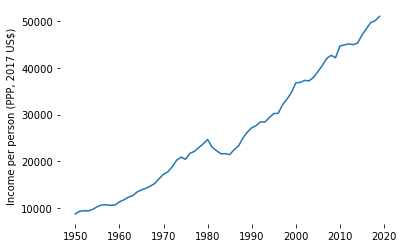

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(BEL_data['rgdpe_over_pop']) 
plt.box(False)   # get rid of the box
plt.ylabel('Income per person (PPP, 2017 US$)')    
plt.show()

Let us now make a time series diagram comparing income per person of Belgium and India:

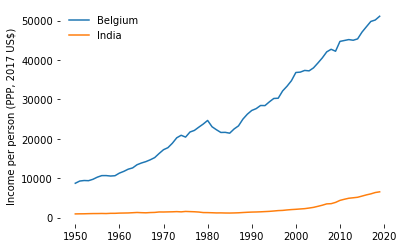

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.box(False)   # get rid of the box
plt.ylabel('Income per person (PPP, 2017 US$)')    
# Plot a line chart:
plt.plot(BEL_data.rgdpe_over_pop, label='Belgium')
plt.plot(IND_data.rgdpe_over_pop, label='India')
plt.legend(edgecolor="None")    # adding legend to the curve (but is better to label the lines - see below)
plt.show() 

Labels next to the lines are better than a legend: 
( https://www.statology.org/matplotlib-add-text/: ` matplotlib.pyplot.text(x, y, s, fontdict=None)`)

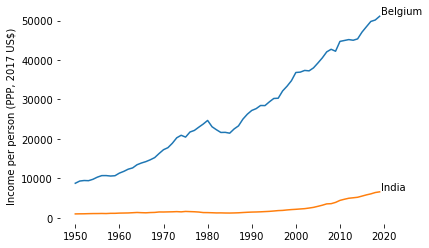

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.box(False)   # get rid of the box
plt.xlabel('')   # label on x-axis
plt.ylabel('Income per person (PPP, 2017 US$)')     
# Plot a line chart:
plt.plot(BEL_data.rgdpe_over_pop, label='Belgium')
plt.plot(IND_data.rgdpe_over_pop, label='India')
y_location_text_1 = BEL_data.loc['2019-01-01'].rgdpe_over_pop
y_location_text_2 = IND_data.loc['2019-01-01'].rgdpe_over_pop
x_location_text_1 = 18000  # I found this value by trial and error; still have to figure out why 18000 works  (12*2020 ?)
x_location_text_2 = 18000  # I found this value by trial and error; still have to figure out why 18000 works  (12*2020 ?)
plt.text(x_location_text_1, y_location_text_1, 'Belgium', horizontalalignment='left', verticalalignment='bottom')   # still to fix: replace 50000 by last value of variable
plt.text(x_location_text_1, y_location_text_2, 'India'  , horizontalalignment='left', verticalalignment='bottom')   # still to fix: replace 120000 by last value of variable
plt.show() 

In the research project for **Introduction to Macroeconomics**, this will be figure 1. If you can't get the diagram with the labels next to the lines, use a diagram with a legend.

To save the plot to a file in .pdf format:

In [27]:
# paste the code from the previous code cell below:


fig.savefig('figure_1.pdf', dpi = 1000, transparent=True)  # dpi: dots per inch (the resolution of the image)
# the plot is saved to the current working directory (cwd)
# to find out what the current working directory (cwd) is:
import os
print('The file is saved to the current working directory: ',os.getcwd())

The file is saved to the current working directory:  /Users/luchens/Documents/jupyter-notebooks


## Average annual growth rate of `rgdpe` between two years


To find the annual growth rate of `rgdpe` between two years economists use a formula using natural logarithms : $$   g \approx \frac{\ln x_{t+k}  - \ln x_t}{k}  $$
(for an explanation, see the assignment for the research project of Introduction to Macroeconomics)

In [28]:
# BEL_data is the dataframe with the data for Belgium (see above). 

begin_year = 1950     # t   in the formula above
end_year   = 2019     # t+k in the formula above

begin_period = pd.to_datetime(begin_year, format='%Y') 
end_period   = pd.to_datetime(end_year  , format='%Y')

begin_value = BEL_data.loc[begin_period].rgdpe_over_pop
end_value   = BEL_data.loc[end_period].rgdpe_over_pop

# Here are the intermediate results
import numpy as np
print("value in " , begin_year, " : ", begin_value)
print("value in " , end_year,   " : ", end_value)
print("ln of value in " , begin_year, " : ", np.log(begin_value))
print("ln of value in " , end_year  , " : ", np.log(end_value))

# average annual growth rate:
g = (float(np.log(end_value)) - float(np.log(begin_value))) / (end_year - begin_year) 
# I had to add float() to make this work
print("growth rate (rounded): ", np.round(g,4))
# multiply by 100% to get the percentage growth rate:
print("The average annual growth rate of rgdpe between", 
      begin_year, "and" , end_year, "was" , np.round(g*100,2),"percent.")

value in  1950  :  8719.369419433619
value in  2019  :  51081.75493408282
ln of value in  1950  :  9.073302200003086
ln of value in  2019  :  10.84118266613584
growth rate (rounded):  0.0256
The average annual growth rate of rgdpe between 1950 and 2019 was 2.56 percent.


## Scatter diagram of labor productivity and income per person

Make a **scatter plot** to investigate whether there is a (linear) relationship between labor productivity and real income per person:

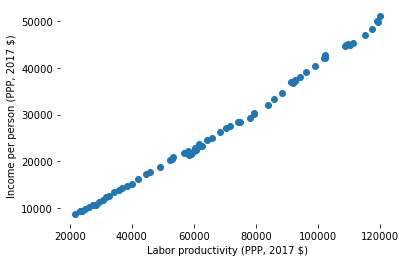

0.9973

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()   # to set the plot size:   plt.figure(figsize=(16, 8), dpi=150) 
plt.box(False)   # get rid of the box
# plt.title("text") # add title
plt.xlabel("Labor productivity (PPP, 2017 $)")   # add label to x-axis
plt.ylabel("Income per person (PPP, 2017 $)")  # add label to y-axis
plt.scatter(BEL_data.rgdpe_over_emp, BEL_data.rgdpe_over_pop)
plt.show()

# coefficient of correlation:
corr = BEL_data.rgdpe_over_emp.corr(BEL_data.rgdpe_over_pop)
import numpy as np
np.round(corr,4)  # round result to four decimals

It is straightforward to do the same for India. For the sake of comparison, combine the two scatter diagrams (figure 2 in the research project for Introduction to Macroeconomics):

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6), dpi=1000)  
plt.subplot(1, 2, 1)   # 1 row, 2 columns, 1st plot
plt.box(False)
plt.title("(a) Belgium") # add title
plt.xlabel("Labor productivity (PPP, 2017 $)")   # add label to x-axis
plt.ylabel("Income per person (PPP, 2017 $)")  # add label to y-axis
plt.scatter(BEL_data.rgdpe_over_emp, BEL_data.rgdpe_over_pop)
plt.subplot(1, 2, 2)   # 1 row, 2 columns, 2nd plot
plt.box(False)
plt.title("(b) India") # add title
plt.xlabel("Labor productivity (PPP, 2017 $)")   # add label to x-axis
plt.ylabel("Income per person (PPP, 2017 $)")  # add label to y-axis
plt.scatter(IND_data.rgdpe_over_emp, IND_data.rgdpe_over_pop)
plt.show()

To save the plot to a file in .pdf format:

In [31]:
# paste the code from the previous code cell below:

fig.savefig('figure_2.pdf', dpi = 1000, transparent=True)  # dpi: dots per inch (the resolution of the image)
# the plot is saved to the current working directory (cwd)
# to find out what the current working directory (cwd) is:
import os
print('The file is saved to the current working directory: ',os.getcwd())

The file is saved to the current working directory:  /Users/luchens/Documents/jupyter-notebooks


**Coefficients of correlation** (research project for Introduction to Macroeconomics):

In [32]:
corr_BEL = BEL_data.rgdpe_over_emp.corr(BEL_data.rgdpe_over_pop) # coefficient of correlation for Belgium
corr_IND = IND_data.rgdpe_over_emp.corr(IND_data.rgdpe_over_pop) # coefficient of correlation for India
import numpy as np
print("Belgium: ", np.round(corr_BEL,4),"     India: ", np.round(corr_IND,4))  # round result to four decimals

Belgium:  0.9973      India:  0.9989
